In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [8]:
x = np.linspace(0, 50, 51)
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

In [9]:
y = x + 10 * np.random.random((len(x)))
y

array([ 4.23353388,  8.81112241,  3.18471462,  8.85752294, 11.8654135 ,
       13.21809706, 10.68326505,  8.7064866 , 15.09888722, 13.8973876 ,
       19.85778414, 12.50271213, 16.1970183 , 14.09384707, 16.27183666,
       22.00880808, 21.58162647, 20.53398169, 26.28473878, 25.21662828,
       23.14828226, 24.10857073, 30.38662732, 29.25028824, 29.05837631,
       26.4753164 , 34.51809029, 32.60085655, 28.50883587, 29.00230085,
       35.88573986, 37.36437409, 40.52296081, 41.29614357, 40.96576373,
       36.78542818, 41.49246382, 46.93995306, 45.147735  , 40.00292472,
       47.35759623, 41.73436331, 51.29586522, 46.21219976, 49.45942566,
       45.75216712, 47.05693659, 54.8032809 , 49.75638548, 55.98618784,
       52.94249652])

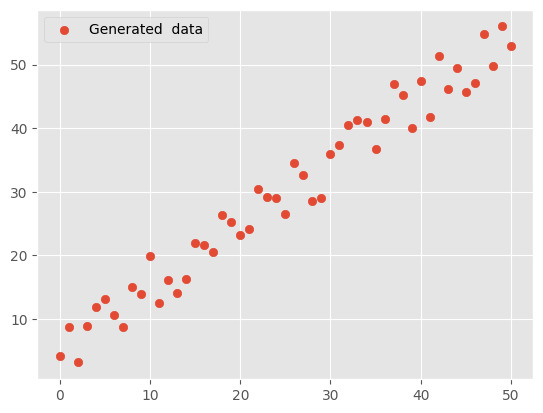

In [10]:
plt.scatter(x, y, label='Generated  data')
plt.legend()
plt.show()

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=[1]))
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(x, y, epochs=20)

Epoch 1/20
2/2 [==============================] - 1s 10ms/step - loss: 25.7348
Epoch 2/20
2/2 [==============================] - 0s 5ms/step - loss: 19.3223
Epoch 3/20
2/2 [==============================] - 0s 4ms/step - loss: 19.5620
Epoch 4/20
2/2 [==============================] - 0s 5ms/step - loss: 15.7731
Epoch 5/20
2/2 [==============================] - 0s 5ms/step - loss: 16.6760
Epoch 6/20
2/2 [==============================] - 0s 5ms/step - loss: 16.0755
Epoch 7/20
2/2 [==============================] - 0s 6ms/step - loss: 14.0328
Epoch 8/20
2/2 [==============================] - 0s 5ms/step - loss: 14.4973
Epoch 9/20
2/2 [==============================] - 0s 5ms/step - loss: 14.8755
Epoch 10/20
2/2 [==============================] - 0s 5ms/step - loss: 13.9207
Epoch 11/20
2/2 [==============================] - 0s 5ms/step - loss: 13.0957
Epoch 12/20
2/2 [==============================] - 0s 6ms/step - loss: 12.8633
Epoch 13/20
2/2 [==============================] - 0s 6ms/st

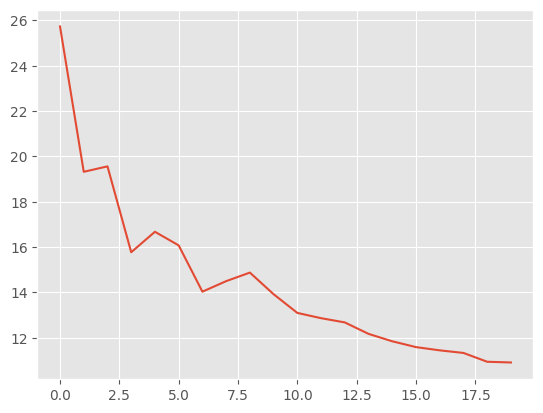

In [14]:
plt.plot(history.history['loss'])
plt.show()

In [15]:
y_pred_model = model.predict(x)

2/2 [==============================] - 0s 4ms/step


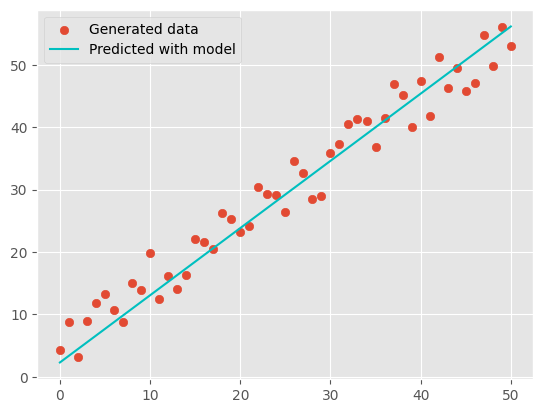

In [16]:
plt.scatter(x, y, label='Generated data')
plt.plot(x, y_pred_model, label='Predicted with model', color='c')
plt.legend()
plt.show()

In [17]:
layer = model.get_layer(index=0)
layer

In [18]:
weights = layer.get_weights()
weights

[array([[1.07662]], dtype=float32), array([2.2896163], dtype=float32)]

In [19]:
m, b = weights[0][0], weights[1]
print(m)
print(b)

[1.07662]
[2.2896163]


In [20]:
y_pred_params = m * x + b
y_pred_params

array([ 2.28961635,  3.36623633,  4.44285631,  5.51947629,  6.59609628,
        7.67271626,  8.74933624,  9.82595623, 10.90257621, 11.97919619,
       13.05581617, 14.13243616, 15.20905614, 16.28567612, 17.3622961 ,
       18.43891609, 19.51553607, 20.59215605, 21.66877604, 22.74539602,
       23.822016  , 24.89863598, 25.97525597, 27.05187595, 28.12849593,
       29.20511591, 30.2817359 , 31.35835588, 32.43497586, 33.51159585,
       34.58821583, 35.66483581, 36.74145579, 37.81807578, 38.89469576,
       39.97131574, 41.04793572, 42.12455571, 43.20117569, 44.27779567,
       45.35441566, 46.43103564, 47.50765562, 48.5842756 , 49.66089559,
       50.73751557, 51.81413555, 52.89075553, 53.96737552, 55.0439955 ,
       56.12061548])

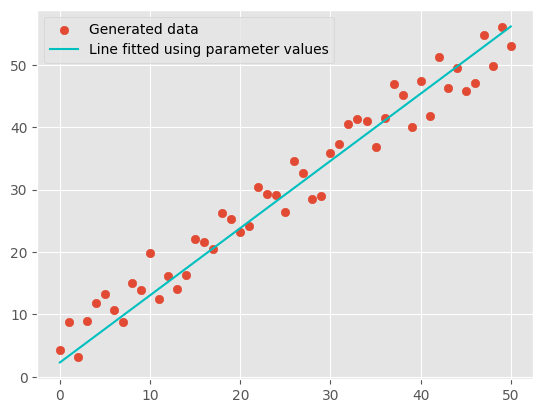

In [21]:
plt.scatter(x, y, label='Generated data')
plt.plot(x, y_pred_params, label='Line fitted using parameter values', color='c')
plt.legend()
plt.show()